In [2]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
df_sugar = pd.read_csv ('../data/psd_sugar.csv')

In [4]:
df_sugar.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,30,Beet Sugar Production,8,(1000 MT),0.0
1,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,20,Beginning Stocks,8,(1000 MT),0.0
2,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,43,Cane Sugar Production,8,(1000 MT),10.0
3,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,176,Ending Stocks,8,(1000 MT),10.0
4,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,88,Exports,8,(1000 MT),0.0


In [5]:
df_sugar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138768 entries, 0 to 138767
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Commodity_Code         138768 non-null  int64  
 1   Commodity_Description  138768 non-null  object 
 2   Country_Code           137984 non-null  object 
 3   Country_Name           138768 non-null  object 
 4   Market_Year            138768 non-null  int64  
 5   Calendar_Year          138768 non-null  int64  
 6   Month                  138768 non-null  int64  
 7   Attribute_ID           138768 non-null  int64  
 8   Attribute_Description  138768 non-null  object 
 9   Unit_ID                138768 non-null  int64  
 10  Unit_Description       138768 non-null  object 
 11  Value                  138768 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 12.7+ MB


## Let's look at the consumption only

In [6]:
df_sugar_cons = df_sugar[df_sugar['Attribute_Description'] == 'Human Dom. Consumption']

In [7]:
df_sugar_cons.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
5,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,139,Human Dom. Consumption,8,(1000 MT),0.0
21,612000,"Sugar, Centrifugal",AF,Afghanistan,1974,1973,0,139,Human Dom. Consumption,8,(1000 MT),60.0
37,612000,"Sugar, Centrifugal",AF,Afghanistan,1975,1974,0,139,Human Dom. Consumption,8,(1000 MT),60.0
53,612000,"Sugar, Centrifugal",AF,Afghanistan,1976,1975,0,139,Human Dom. Consumption,8,(1000 MT),55.0
69,612000,"Sugar, Centrifugal",AF,Afghanistan,1977,1976,0,139,Human Dom. Consumption,8,(1000 MT),60.0


## Let's look at the consumption of sugar in the US from 1973 - 2021

In [8]:
df_sugar_cons_USA = df_sugar_cons[df_sugar_cons['Country_Name'] == 'United States']
df_sugar_cons_USA.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
130725,612000,"Sugar, Centrifugal",US,United States,1960,1959,0,139,Human Dom. Consumption,8,(1000 MT),8671.0
130741,612000,"Sugar, Centrifugal",US,United States,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),8868.0
130757,612000,"Sugar, Centrifugal",US,United States,1962,1961,0,139,Human Dom. Consumption,8,(1000 MT),9106.0
130773,612000,"Sugar, Centrifugal",US,United States,1963,1962,0,139,Human Dom. Consumption,8,(1000 MT),9150.0
130789,612000,"Sugar, Centrifugal",US,United States,1964,1963,0,139,Human Dom. Consumption,8,(1000 MT),9194.0


In [9]:
df_sugar_cons_USA.isnull().sum()

Commodity_Code           0
Commodity_Description    0
Country_Code             0
Country_Name             0
Market_Year              0
Calendar_Year            0
Month                    0
Attribute_ID             0
Attribute_Description    0
Unit_ID                  0
Unit_Description         0
Value                    0
dtype: int64

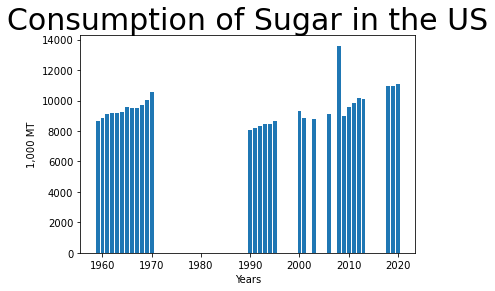

In [10]:
plt.bar(df_sugar_cons_USA.Calendar_Year, df_sugar_cons_USA.Value, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('1,000 MT')
plt.title('Consumption of Sugar in the US', size = 30)
plt.show()

## Let's look at the unique countries

In [11]:
list(df_sugar_cons['Country_Name'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'EU-15',
 'EU-25',
 'European Union',
 'Fiji',
 'Finland',
 'Former Czechoslovakia',
 'Former Yugoslavia',
 'Fr.Ter.Africa-Issas',
 'France',
 'French Polynesia',
 'French West Indies',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'German Democratic Republic',
 'Germany, Fede

## let's look at France

In [12]:
df_sugar_cons_FR = df_sugar_cons[df_sugar_cons['Country_Name'] == 'France']
df_sugar_cons_FR.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
45845,612000,"Sugar, Centrifugal",FR,France,1960,1959,0,139,Human Dom. Consumption,8,(1000 MT),0.0
45861,612000,"Sugar, Centrifugal",FR,France,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),0.0
45877,612000,"Sugar, Centrifugal",FR,France,1962,1961,0,139,Human Dom. Consumption,8,(1000 MT),0.0
45893,612000,"Sugar, Centrifugal",FR,France,1964,1963,0,139,Human Dom. Consumption,8,(1000 MT),0.0
45909,612000,"Sugar, Centrifugal",FR,France,1965,1964,0,139,Human Dom. Consumption,8,(1000 MT),0.0


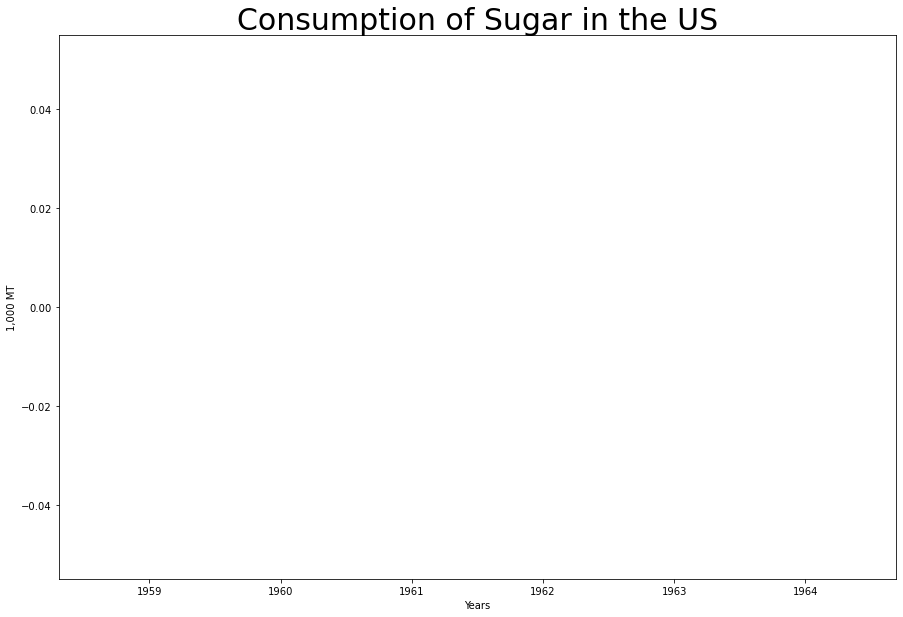

In [13]:
plt.bar(df_sugar_cons_FR.Calendar_Year, df_sugar_cons_FR.Value, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('1,000 MT')
plt.title('Consumption of Sugar in the US', size = 30)
plt.show()

In [14]:
df_sugar_cons_FR['Value'].value_counts()

0.0    5
Name: Value, dtype: int64

## let's look at India

In [15]:
df_sugar_cons_IN = df_sugar_cons[df_sugar_cons['Country_Name'] == 'India']
df_sugar_cons_IN.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
60389,612000,"Sugar, Centrifugal",IN,India,1960,1959,0,139,Human Dom. Consumption,8,(1000 MT),2269.0
60405,612000,"Sugar, Centrifugal",IN,India,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),2513.0
60421,612000,"Sugar, Centrifugal",IN,India,1962,1961,0,139,Human Dom. Consumption,8,(1000 MT),2503.0
60437,612000,"Sugar, Centrifugal",IN,India,1963,1962,0,139,Human Dom. Consumption,8,(1000 MT),2833.0
60453,612000,"Sugar, Centrifugal",IN,India,1964,1963,0,139,Human Dom. Consumption,8,(1000 MT),2595.0


In [16]:
# another way to do it would be:
df_sugar_cons.groupby('Country_Name').get_group('India').head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
60389,612000,"Sugar, Centrifugal",IN,India,1960,1959,0,139,Human Dom. Consumption,8,(1000 MT),2269.0
60405,612000,"Sugar, Centrifugal",IN,India,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),2513.0
60421,612000,"Sugar, Centrifugal",IN,India,1962,1961,0,139,Human Dom. Consumption,8,(1000 MT),2503.0
60437,612000,"Sugar, Centrifugal",IN,India,1963,1962,0,139,Human Dom. Consumption,8,(1000 MT),2833.0
60453,612000,"Sugar, Centrifugal",IN,India,1964,1963,0,139,Human Dom. Consumption,8,(1000 MT),2595.0


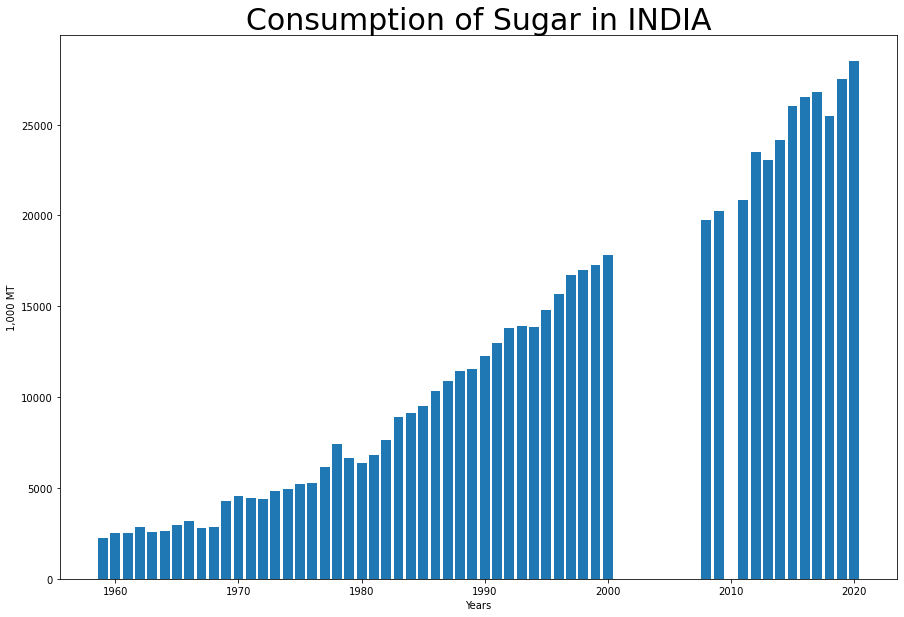

In [17]:
plt.bar(df_sugar_cons_IN.Calendar_Year, df_sugar_cons_IN.Value, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('1,000 MT')
plt.title('Consumption of Sugar in INDIA', size = 30)
plt.show()

## Subplot USA next to India

<BarContainer object of 62 artists>

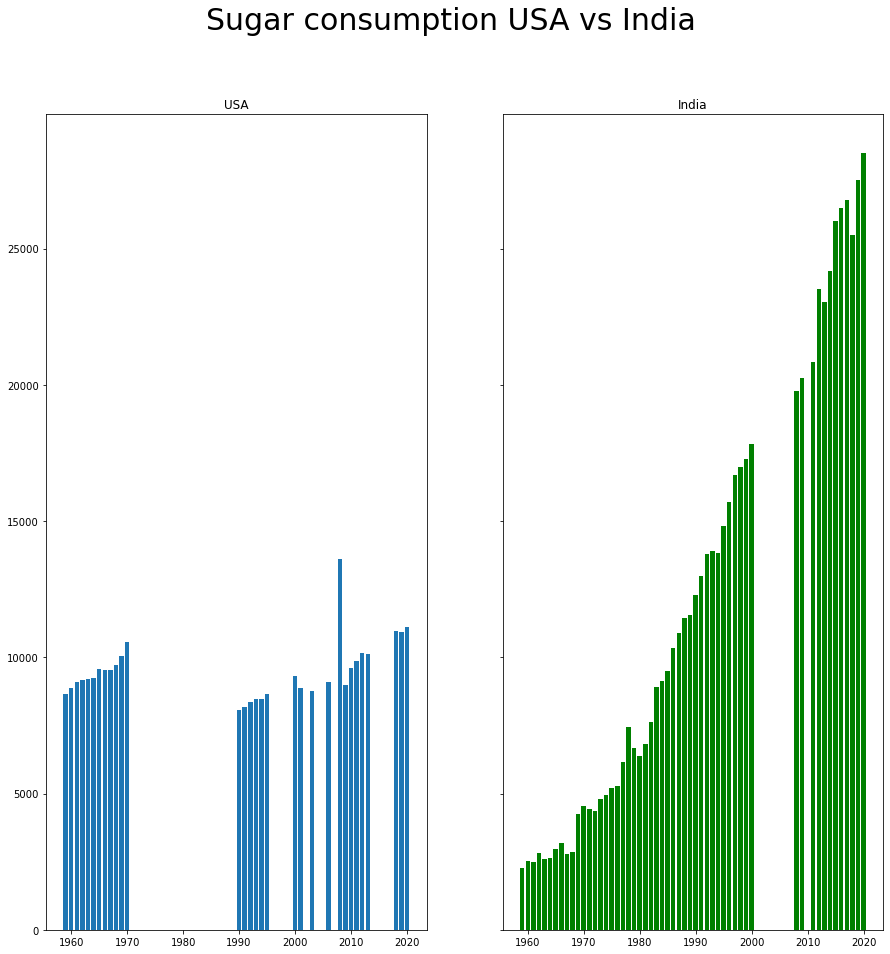

In [18]:
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (15,15))
fig.suptitle('Sugar consumption USA vs India', size = 30)
ax1.set_title('USA')
ax1.bar(df_sugar_cons_USA.Calendar_Year, df_sugar_cons_USA.Value)

ax2.set_title('India')
ax2.bar(df_sugar_cons_IN.Calendar_Year, df_sugar_cons_IN.Value, color = 'green')



## let's look at all the countries combined 

In [19]:
df_sugar_cons.head(2)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
5,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,139,Human Dom. Consumption,8,(1000 MT),0.0
21,612000,"Sugar, Centrifugal",AF,Afghanistan,1974,1973,0,139,Human Dom. Consumption,8,(1000 MT),60.0


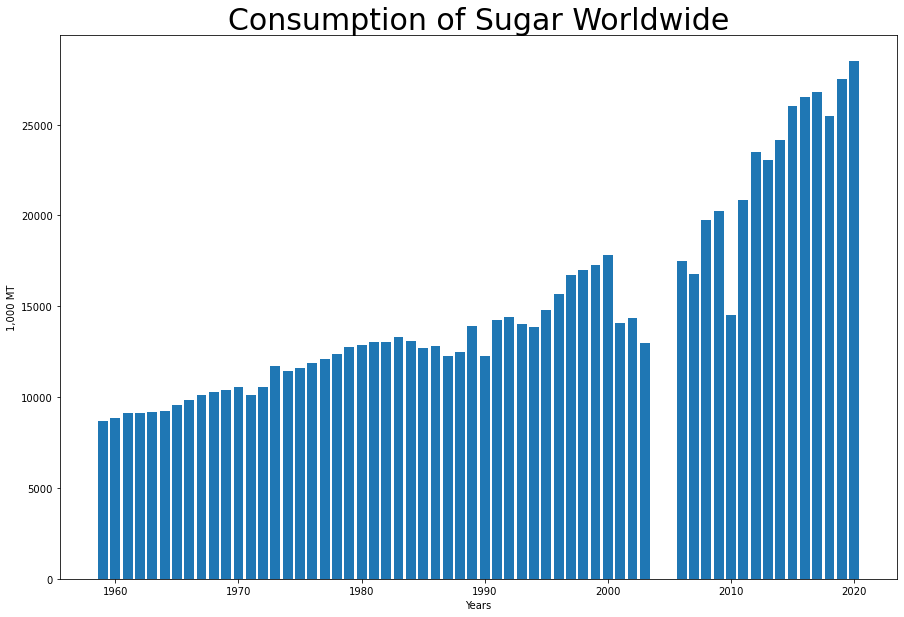

In [20]:
plt.bar(df_sugar_cons.Calendar_Year, df_sugar_cons.Value, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('1,000 MT')
plt.title('Consumption of Sugar Worldwide', size = 30)
plt.show()

In [21]:
df_sugar_cons.head(1)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
5,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,139,Human Dom. Consumption,8,(1000 MT),0.0


In [22]:
df_sugar_cons.sort_values(by = ['Value'], ascending=False).head(50)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
61365,612000,"Sugar, Centrifugal",IN,India,2021,2020,11,139,Human Dom. Consumption,8,(1000 MT),28500.0
61333,612000,"Sugar, Centrifugal",IN,India,2019,2019,11,139,Human Dom. Consumption,8,(1000 MT),27500.0
61349,612000,"Sugar, Centrifugal",IN,India,2020,2020,11,139,Human Dom. Consumption,8,(1000 MT),27000.0
61285,612000,"Sugar, Centrifugal",IN,India,2016,2017,11,139,Human Dom. Consumption,8,(1000 MT),26800.0
61317,612000,"Sugar, Centrifugal",IN,India,2018,2019,5,139,Human Dom. Consumption,8,(1000 MT),26500.0
61269,612000,"Sugar, Centrifugal",IN,India,2015,2016,5,139,Human Dom. Consumption,8,(1000 MT),26500.0
61253,612000,"Sugar, Centrifugal",IN,India,2014,2015,11,139,Human Dom. Consumption,8,(1000 MT),26023.0
61237,612000,"Sugar, Centrifugal",IN,India,2013,2015,11,139,Human Dom. Consumption,8,(1000 MT),25588.0
61301,612000,"Sugar, Centrifugal",IN,India,2017,2018,5,139,Human Dom. Consumption,8,(1000 MT),25500.0
61221,612000,"Sugar, Centrifugal",IN,India,2012,2014,5,139,Human Dom. Consumption,8,(1000 MT),24180.0


In [23]:
## let's look at India, European Union, EU-25, China

In [24]:
df_sugar_cons_China = df_sugar_cons[df_sugar_cons['Country_Name'] == 'China']
df_sugar_cons_EU = df_sugar_cons[df_sugar_cons['Country_Name'] == 'European Union']

<BarContainer object of 20 artists>

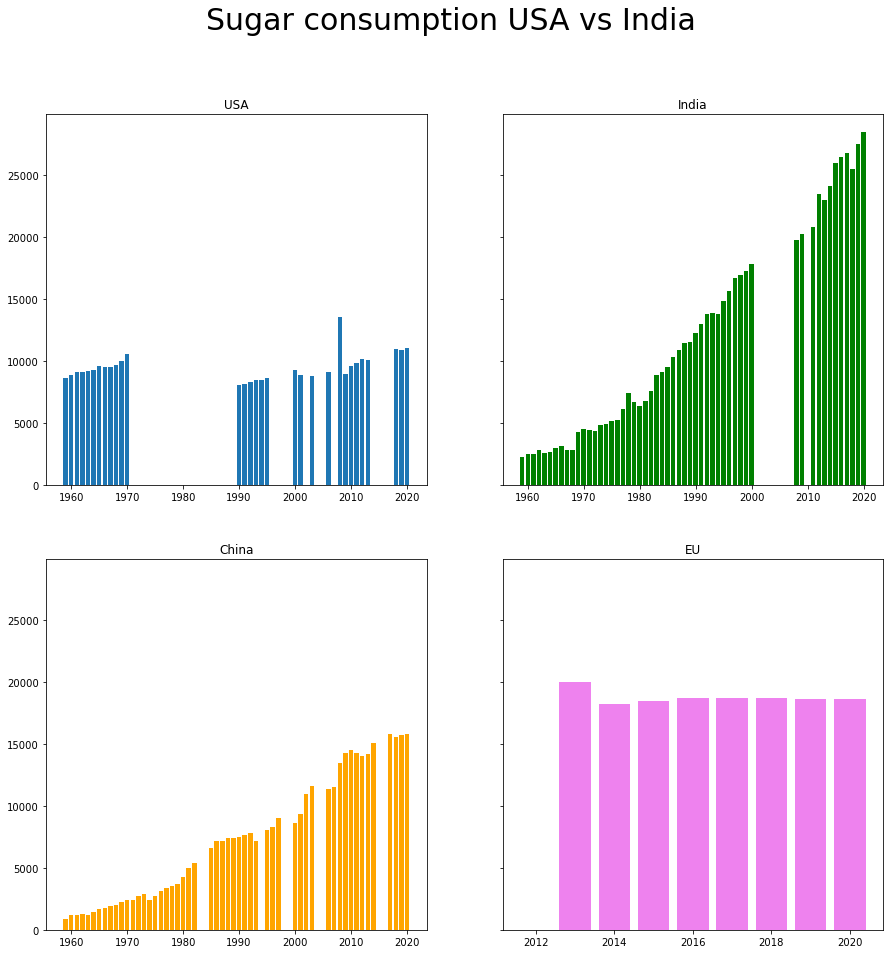

In [25]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, sharey = True, figsize = (15,15))
fig.suptitle('Sugar consumption USA vs India', size = 30)
ax1.set_title('USA')
ax1.bar(df_sugar_cons_USA.Calendar_Year, df_sugar_cons_USA.Value)

ax2.set_title('India')
ax2.bar(df_sugar_cons_IN.Calendar_Year, df_sugar_cons_IN.Value, color = 'green')

ax3.set_title('China')
ax3.bar(df_sugar_cons_China.Calendar_Year, df_sugar_cons_China.Value, color = 'orange')

ax4.set_title('EU')
ax4.bar(df_sugar_cons_EU.Calendar_Year, df_sugar_cons_EU.Value, color = 'violet')

## Concatenating European Union + EU-15 + EU-25

In [26]:
df_sugar_cons_EU15 = df_sugar_cons[df_sugar_cons['Country_Name'] == 'EU-15']
df_sugar_cons_EU15.head(2)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
42181,612000,"Sugar, Centrifugal",E2,EU-15,1960,1959,0,139,Human Dom. Consumption,8,(1000 MT),0.0
42197,612000,"Sugar, Centrifugal",E2,EU-15,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),5474.0


## Dropping the 0 value for EU-15

In [27]:
df_sugar_cons_EU15.drop(df_sugar_cons_EU15.index[0], inplace = True)

C:\Users\Celine\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
df_sugar_cons_EU15.head(2)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
42197,612000,"Sugar, Centrifugal",E2,EU-15,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),5474.0
42213,612000,"Sugar, Centrifugal",E2,EU-15,1962,1961,0,139,Human Dom. Consumption,8,(1000 MT),5840.0


## There is no 0 value in EU-25 - nothing to drop

In [29]:
df_sugar_cons_EU25 = df_sugar_cons[df_sugar_cons['Country_Name'] == 'EU-25']
df_sugar_cons_EU25

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
42901,612000,"Sugar, Centrifugal",E3,EU-25,2005,2006,5,139,Human Dom. Consumption,8,(1000 MT),17505.0
42917,612000,"Sugar, Centrifugal",E3,EU-25,2006,2007,5,139,Human Dom. Consumption,8,(1000 MT),16800.0


## Dropping the 0 value for European Union

In [30]:
df_sugar_cons_EU.head(6)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
42933,612000,"Sugar, Centrifugal",E4,European Union,2002,2012,5,139,Human Dom. Consumption,8,(1000 MT),0.0
42949,612000,"Sugar, Centrifugal",E4,European Union,2003,2012,5,139,Human Dom. Consumption,8,(1000 MT),0.0
42965,612000,"Sugar, Centrifugal",E4,European Union,2004,2012,5,139,Human Dom. Consumption,8,(1000 MT),0.0
42981,612000,"Sugar, Centrifugal",E4,European Union,2005,2012,5,139,Human Dom. Consumption,8,(1000 MT),0.0
42997,612000,"Sugar, Centrifugal",E4,European Union,2006,2012,5,139,Human Dom. Consumption,8,(1000 MT),0.0
43013,612000,"Sugar, Centrifugal",E4,European Union,2007,2013,11,139,Human Dom. Consumption,8,(1000 MT),20046.0


In [31]:
df_sugar_cons_EU.drop(df_sugar_cons_EU.index[0:5], inplace = True)

C:\Users\Celine\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
df_sugar_cons_EU.head(2)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
43013,612000,"Sugar, Centrifugal",E4,European Union,2007,2013,11,139,Human Dom. Consumption,8,(1000 MT),20046.0
43029,612000,"Sugar, Centrifugal",E4,European Union,2008,2013,11,139,Human Dom. Consumption,8,(1000 MT),16716.0


## Now we can append all 3 EU

In [33]:
df_concat_EU = df_sugar_cons_EU15.append(df_sugar_cons_EU25).append(df_sugar_cons_EU)

In [34]:
df_concat_EU

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
42197,612000,"Sugar, Centrifugal",E2,EU-15,1961,1960,0,139,Human Dom. Consumption,8,(1000 MT),5474.0
42213,612000,"Sugar, Centrifugal",E2,EU-15,1962,1961,0,139,Human Dom. Consumption,8,(1000 MT),5840.0
42229,612000,"Sugar, Centrifugal",E2,EU-15,1963,1962,0,139,Human Dom. Consumption,8,(1000 MT),6108.0
42245,612000,"Sugar, Centrifugal",E2,EU-15,1964,1963,0,139,Human Dom. Consumption,8,(1000 MT),6251.0
42261,612000,"Sugar, Centrifugal",E2,EU-15,1965,1964,0,139,Human Dom. Consumption,8,(1000 MT),6548.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43173,612000,"Sugar, Centrifugal",E4,European Union,2017,2018,11,139,Human Dom. Consumption,8,(1000 MT),18750.0
43189,612000,"Sugar, Centrifugal",E4,European Union,2018,2019,11,139,Human Dom. Consumption,8,(1000 MT),18600.0
43205,612000,"Sugar, Centrifugal",E4,European Union,2019,2020,11,139,Human Dom. Consumption,8,(1000 MT),18600.0
43221,612000,"Sugar, Centrifugal",E4,European Union,2020,2020,11,139,Human Dom. Consumption,8,(1000 MT),18300.0


## let's plot the result

<BarContainer object of 61 artists>

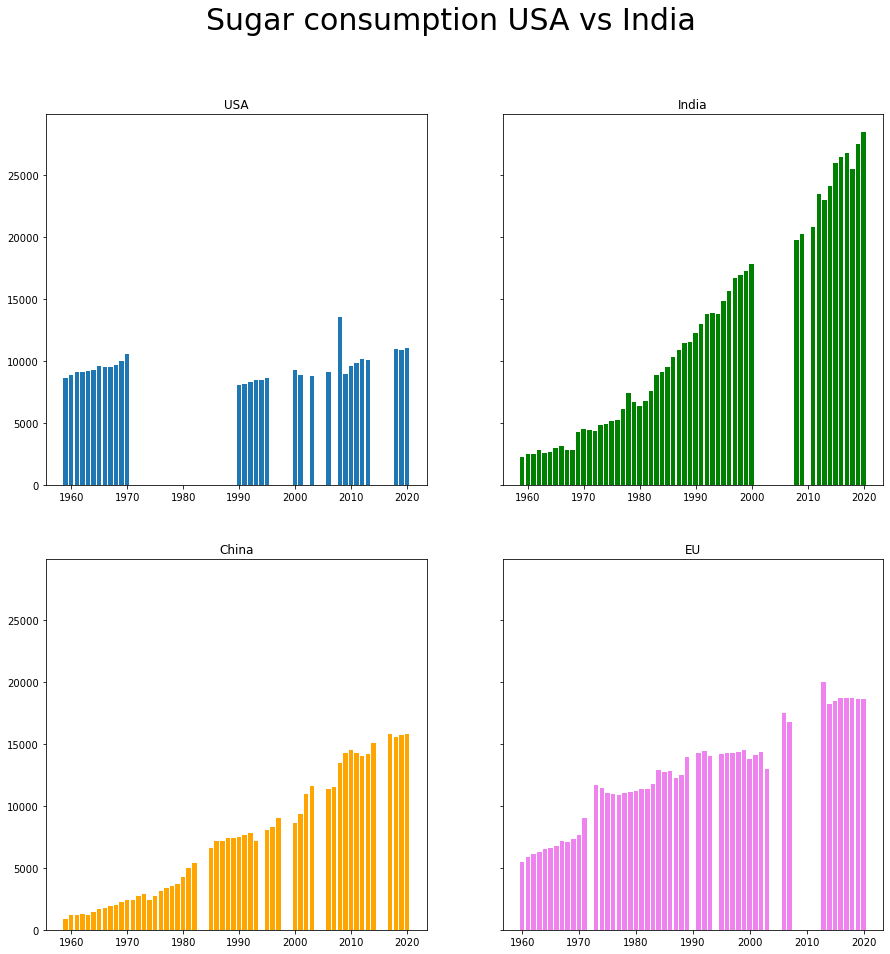

In [35]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, sharey = True, figsize = (15,15))
fig.suptitle('Sugar consumption USA vs India', size = 30)
ax1.set_title('USA')
ax1.bar(df_sugar_cons_USA.Calendar_Year, df_sugar_cons_USA.Value)

ax2.set_title('India')
ax2.bar(df_sugar_cons_IN.Calendar_Year, df_sugar_cons_IN.Value, color = 'green')

ax3.set_title('China')
ax3.bar(df_sugar_cons_China.Calendar_Year, df_sugar_cons_China.Value, color = 'orange')

ax4.set_title('EU')
ax4.bar(df_concat_EU.Calendar_Year, df_concat_EU.Value, color = 'violet')

## Now I want to look at consumption per capita. For that I will look for a population dataset and create a new column per capita and do a new analysis on it

## FIRST Let's normalize UE and append it to the df_sugar_cons

In [36]:
index_names = df_sugar_cons[(df_sugar_cons['Country_Code'] == 'UE') & (df_sugar_cons['Country_Code'] == 'UE-15') & (df_sugar_cons['Country_Code'] == 'UE-25')].index

In [50]:
df_sugar_cons_norm = df_sugar_cons.drop(index_names)

In [51]:
df_sugar_cons_norm.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
5,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,139,Human Dom. Consumption,8,(1000 MT),0.0
21,612000,"Sugar, Centrifugal",AF,Afghanistan,1974,1973,0,139,Human Dom. Consumption,8,(1000 MT),60.0
37,612000,"Sugar, Centrifugal",AF,Afghanistan,1975,1974,0,139,Human Dom. Consumption,8,(1000 MT),60.0
53,612000,"Sugar, Centrifugal",AF,Afghanistan,1976,1975,0,139,Human Dom. Consumption,8,(1000 MT),55.0
69,612000,"Sugar, Centrifugal",AF,Afghanistan,1977,1976,0,139,Human Dom. Consumption,8,(1000 MT),60.0


## now that I removed UE UE-15 and EU-25, I will append the new UE that I created in df_concat_EU

In [52]:
df_sugar_cons_norm = df_sugar_cons.append(df_concat_EU)

In [53]:
df_sugar_cons_norm.head(2)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
5,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,139,Human Dom. Consumption,8,(1000 MT),0.0
21,612000,"Sugar, Centrifugal",AF,Afghanistan,1974,1973,0,139,Human Dom. Consumption,8,(1000 MT),60.0


## SECOND Groupby statement to look at sugar consumption per country from 1960 - 2021 combined

In [54]:
df_sugar_cons_norm.head(2)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
5,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,139,Human Dom. Consumption,8,(1000 MT),0.0
21,612000,"Sugar, Centrifugal",AF,Afghanistan,1974,1973,0,139,Human Dom. Consumption,8,(1000 MT),60.0


In [55]:
df_groupby = df_sugar_cons_norm.groupby('Country_Name', as_index=False)[['Value']].sum()

In [56]:
df_groupby

,Country_Name,Value
0,Afghanistan,3020.0
1,Albania,2747.0
2,Algeria,48467.0
3,Angola,10882.0
4,Argentina,76730.0
...,...,...
189,Yemen,16148.0
190,Yemen (Aden),971.0
191,Yemen (Sanaa),2694.0
192,Zambia,8051.0


In [57]:
df_groupby_most = df_groupby.sort_values(by= 'Value', ascending=False).head(20)
df_groupby_most

,Country_Name,Value
47,EU-15,983814.0
85,India,819038.0
182,United States,583749.0
55,European Union,548696.0
33,China,476792.0
20,Brazil,448897.0
179,Union of Soviet Socialist Repu,330375.0
117,Mexico,219601.0
145,Russia,186923.0
86,Indonesia,174494.0


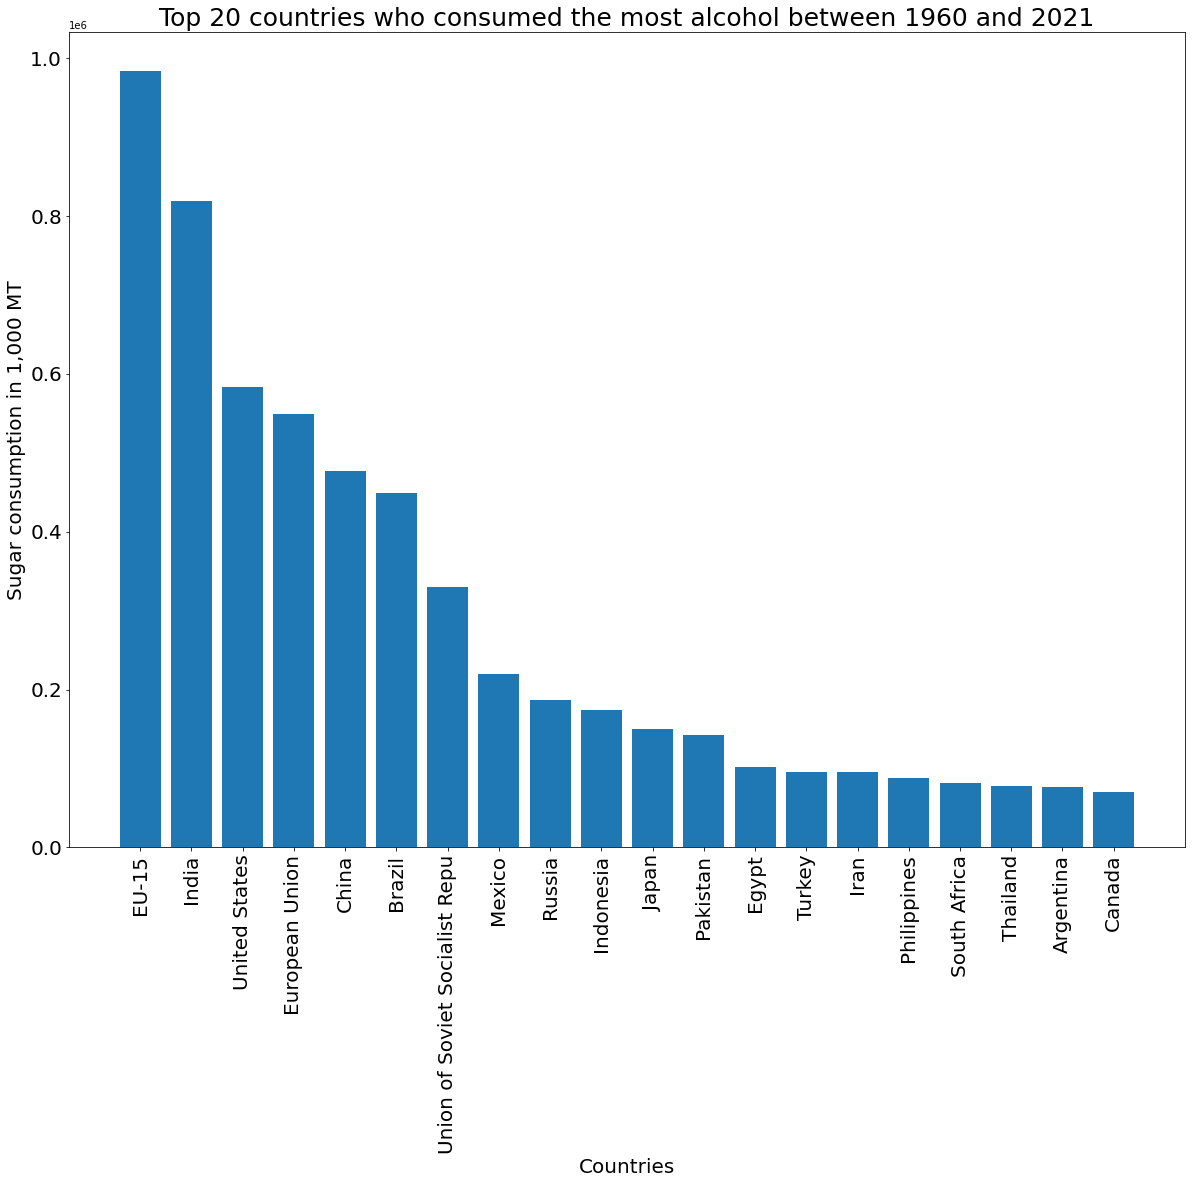

In [58]:
plt.bar(df_groupby_most.Country_Name, df_groupby_most.Value, linewidth=2)
plt.rcParams["figure.figsize"] = [20,15]
#plt.xticks(range(30))
plt.xlabel('Countries', size = 20)
plt.xticks(rotation = 90, size= 20)
plt.yticks(size = 20)
plt.ylabel('Sugar consumption in 1,000 MT', size = 20)
plt.title('Top 20 countries who consumed the most alcohol between 1960 and 2021', size = 25)
plt.show()

In [59]:
df_groupby_least = df_groupby.sort_values(by= 'Value').head(20)
df_groupby_least

,Country_Name,Value
123,Netherlands,0.0
68,"Germany, Federal Republic of",0.0
91,Italy,0.0
61,France,0.0
60,Fr.Ter.Africa-Issas,0.0
188,Virgin Islands of the U.S.,0.0
143,Reunion,0.0
114,Martinique,0.0
71,Gilbert and Ellice Islands,15.0
73,Greenland,18.0


In [60]:
df_groupby_least.drop(df_groupby_least.index[0:8], inplace = True)

In [ ]:
plt.bar(df_groupby_least.Country_Name, df_groupby_least.Value, linewidth=2)
plt.rcParams["figure.figsize"] = [20,15]
#plt.xticks(range(30))
plt.xlabel('Countries', size = 20)
plt.xticks(rotation = 90, size= 20)
plt.yticks(size = 20)
plt.ylabel('Sugar consumption in 1,000 MT', size = 20)
plt.title('Top 20 countries who consumed the least alcohol between 1960 and 2021', size = 25)
plt.show()